# Task 1: Training the Model

In [15]:
# Import libraries
import numpy as np
import cv2
import time
import os
import itertools
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# I. Downloading Building the Mode
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2 
# Load the pre-trained MobileNetV2 model, excluding the top classification layer
base_model = MobileNetV2(input_shape=(96, 96, 3), include_top=False, weights='imagenet')
# Freeze the base model
base_model.trainable = False

In [3]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
# Create new model on top
inputs = Input(shape=(96, 96, 3))
x = base_model(inputs)
x = GlobalAveragePooling2D()(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 2,270,794
Trainable params: 12,810
Non-trainable params: 2,257,984
_________________________________________________________________


In [4]:
# II. Downloading and Processing the Data
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
# Load CIFAR-10 data
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0
# Convert labels to one-hot encoding     
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)
# Resize images from 32x32 to 96x96 to fit MobileNetV2 input size requirements
train_images_resized = tf.image.resize(train_images, (96, 96))
test_images_resized = tf.image.resize(test_images, (96, 96))


In [5]:
# III. Compiling and Training the Model
# To avoid Kernel crash
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', 
metrics=['accuracy']) 
# Train the model
history=model.fit(
 train_images_resized, train_labels, 
 epochs=5, 
 batch_size = 128,
 validation_split=0.3,
) 


Epoch 1/5
274/274 [==============================] - 205s 683ms/step - loss: 0.9204 - accuracy: 0.6861 - val_loss: 0.6825 - val_accuracy: 0.7643
Epoch 2/5
274/274 [==============================] - 186s 680ms/step - loss: 0.6285 - accuracy: 0.7820 - val_loss: 0.6426 - val_accuracy: 0.7751
Epoch 3/5
274/274 [==============================] - 172s 627ms/step - loss: 0.5735 - accuracy: 0.8014 - val_loss: 0.6010 - val_accuracy: 0.7931
Epoch 4/5
274/274 [==============================] - 169s 618ms/step - loss: 0.5418 - accuracy: 0.8125 - val_loss: 0.6344 - val_accuracy: 0.7796
Epoch 5/5
274/274 [==============================] - 172s 628ms/step - loss: 0.5182 - accuracy: 0.8195 - val_loss: 0.5791 - val_accuracy: 0.7946


In [6]:
# Evaluate the model  
model.evaluate(test_images_resized, test_labels)

313/313 [==============================] - 43s 136ms/step - loss: 0.5749 - accuracy: 0.7981


[0.5749349594116211, 0.7980999946594238]

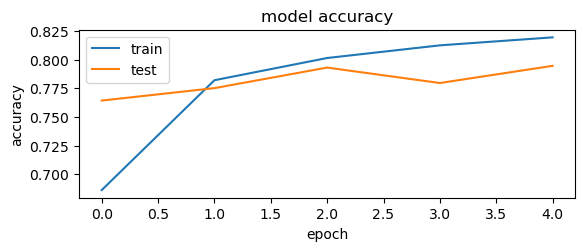

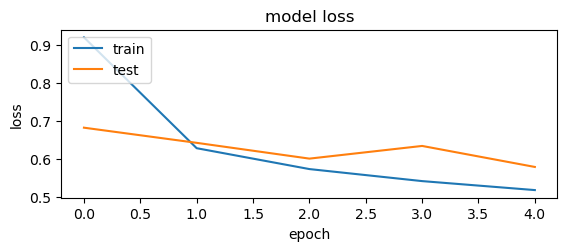

In [7]:
#a) Show the plots during the training for the loss and accuracy of the training and validation data.

# Visualize Model Training History 
plt.subplot(211)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
#b) What accuracy did the model achieve on the training, validation data, and test data?

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(train_images_resized, train_labels, verbose=0)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(test_images_resized, test_labels, verbose=0)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Evaluate the model on test data (already in the original code)
test_loss, test_accuracy = model.evaluate(test_images_resized, test_labels)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

Training Accuracy: 82.10%
Validation Accuracy: 79.81%
313/313 [==============================] - 42s 134ms/step - loss: 0.5749 - accuracy: 0.7981
Test Accuracy: 79.81%


# Task 2: Optimizing the mode

IV. Grid Search Optimization

a) Define the Grid: Create a grid of possible three values for each of the two chosen 
hyperparameters.
b) Model Training: Train your model using each combination of hyperparameters in the grid.
c) Logging with TensorBoard: Log training metrics for each model configuration using 
TensorBoard.
d) Analysis: Analyze the TensorBoard outputs to determine the impact of different 
hyperparameter values on the model's performance

In [11]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import TensorBoard

# Define the grid search space
batch_sizes = [128,180,240]
Neurons=[32,64,128]

# Grid search
for batch_size, neuron in itertools.product(batch_sizes,Neurons):
    # Unique identifier for each model configuration
    run_name = f"Batch_size={batch_size}-Neurons={neuron}"
    print(f"Training model with {run_name}")
    # Set up TensorBoard logging
    log_dir = "Grid_FinalLogs/" + run_name + "-" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1) 
    
    # Create and train the model
    # Create new model on top
    inputs = Input(shape=(96, 96, 3))
    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    # Add a new dense layer with 64 units and ReLU activation
    x = Dense(neuron, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    model = Model(inputs, outputs) 
    
    #Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
   
    # Train the model
    model.fit(train_images_resized, train_labels, epochs=8, batch_size = batch_size,validation_split=0.3,callbacks=[tensorboard_callback], verbose=0) 

    # Evaluate the model
    loss, accuracy = model.evaluate(test_images_resized, test_labels, verbose=0)
    print(f"Finished {run_name} with Accuracy: {accuracy}")
    # Instructions to view in TensorBoard
    print("To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs")
    
    



Training model with Batch_size=128-Neurons=32
Finished Batch_size=128-Neurons=32 with Accuracy: 0.8015000224113464
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=128-Neurons=64
Finished Batch_size=128-Neurons=64 with Accuracy: 0.8064000010490417
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=128-Neurons=128
Finished Batch_size=128-Neurons=128 with Accuracy: 0.8080999851226807
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=180-Neurons=32
Finished Batch_size=180-Neurons=32 with Accuracy: 0.7950999736785889
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=180-Neurons=64
Finished Batch_size=180-Neurons=64 with Accuracy: 0.79830002784729
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=180-Neurons=128
Finished Batch_size=180

In [ ]:
Training model with Batch_size=128-Neurons=32
Finished Batch_size=128-Neurons=32 with Accuracy: 0.8015000224113464
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=128-Neurons=64
Finished Batch_size=128-Neurons=64 with Accuracy: 0.8064000010490417
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=128-Neurons=128
Finished Batch_size=128-Neurons=128 with Accuracy: 0.8080999851226807
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=180-Neurons=32
Finished Batch_size=180-Neurons=32 with Accuracy: 0.7950999736785889
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=180-Neurons=64
Finished Batch_size=180-Neurons=64 with Accuracy: 0.79830002784729
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=180-Neurons=128
Finished Batch_size=180-Neurons=128 with Accuracy: 0.8009999990463257
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=240-Neurons=32
Finished Batch_size=240-Neurons=32 with Accuracy: 0.7961999773979187
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=240-Neurons=64
Finished Batch_size=240-Neurons=64 with Accuracy: 0.8123000264167786
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=240-Neurons=128
Finished Batch_size=240-Neurons=128 with Accuracy: 0.8084999918937683
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs 

Below are the results of experimented pairs 

Training model with Batch_size=64-epoch=5 LearningRate=0.001
Finished Batch_size=64-epoch=5 LearningRate=0.001 with Accuracy: 0.796500027179718
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=64-epoch=10 LearningRate=0.001
Finished Batch_size=64-epoch=10 LearningRate=0.001 with Accuracy: 0.8039000034332275
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=128-epoch=5 LearningRate=0.001
Finished Batch_size=128-epoch=5 LearningRate=0.001 with Accuracy: 0.8004000186920166
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=128-epoch=10 LearningRate=0.001
Finished Batch_size=128-epoch=10 LearningRate=0.001 with Accuracy: 0.8046000003814697
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
    
Training model with Batch_size=180-epoch=5 LearningRate=0.001
Finished Batch_size=180-epoch=5 LearningRate=0.001 with Accuracy: 0.7943000197410583
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=180-epoch=10 LearningRate=0.001
Finished Batch_size=180-epoch=10 LearningRate=0.001 with Accuracy: 0.8069999814033508
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=240-epoch=5 LearningRate=0.001
Finished Batch_size=240-epoch=5 LearningRate=0.001 with Accuracy: 0.7985000014305115
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs
Training model with Batch_size=240-epoch=10 LearningRate=0.001
Finished Batch_size=240-epoch=10 LearningRate=0.001 with Accuracy: 0.807200014591217
To view the TensorBoard logs, run: tensorboard --logdir Grid_FinalLogs


# V. Random Search Optimization
Choose three different hyperparameters from the above hyperparameters list for random search 
optimization.
a) Random Sampling: Randomly select combinations of values for the three chosen 
hyperparameters.
b) Model Training: Train your model using each randomly selected combination.
c) Logging with TensorBoard: Use TensorBoard to log the performance metrics of each training 
session.
d) Analysis: Evaluate the TensorBoard outputs to determine which combinations yield the best 
performance

In [14]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.callbacks import TensorBoard
import random
# Define the grid search space

Neurons= [32,64,128]
batch_sizes = [64,128,180]
epochs = [5,10,15]

# Randomly choosing the number of runs to be perforemd and the min and max is 6 and 12 
runs=random.choice(np.arange(6,12 ))

# Random search
for _ in range(runs):
    #Picking random number of neurons from Neurons list
    neuron=random.choice(Neurons)
    #Picking random number of batch_size from Batch_sizes list
    batch_size=random.choice(batch_sizes)
    #Picking random number of epoch from Epochs list
    epoch=random.choice(epochs)
    
    # Unique identifier for each model configuration
    run_name = f"Batch_size={batch_size}-Neurons={neuron}-ephocs={epoch}"
    print(f"Training model with {run_name}")
    
    # Set up TensorBoard logging
    log_dir = "RandomSearch_FinalLogs/" + run_name + "-" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1) 
    
    # Create and train the model
    
    # Create new model on top
    inputs = Input(shape=(96, 96, 3))
    x = base_model(inputs)
    x = GlobalAveragePooling2D()(x)
    # Add a new dense layer with 64 units and ReLU activation
    x = Dense(neuron, activation='relu')(x)
    # Adding the output layer
    outputs = Dense(10, activation='softmax')(x)
    
    model = Model(inputs, outputs) 
    
    model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    # Train the model
    model.fit(train_images_resized, train_labels, epochs=epoch, batch_size = batch_size,validation_split=0.3,callbacks=[tensorboard_callback], verbose=0) 

    # Evaluate the model
    loss, accuracy = model.evaluate(test_images_resized, test_labels, verbose=0)
    print(f"Finished {run_name} with Accuracy: {accuracy}")
    # Instructions to view in TensorBoard
    print("To view the TensorBoard logs, run: tensorboard --logdir RandomSearch_FinalLogs")
    
    

Training model with Batch_size=180-Neurons=32-ephocs=10
Finished Batch_size=180-Neurons=32-ephocs=10 with Accuracy: 0.8015999794006348
To view the TensorBoard logs, run: tensorboard --logdir RandomSearch_FinalLogs
Training model with Batch_size=64-Neurons=64-ephocs=10
Finished Batch_size=64-Neurons=64-ephocs=10 with Accuracy: 0.7968999743461609
To view the TensorBoard logs, run: tensorboard --logdir RandomSearch_FinalLogs
Training model with Batch_size=64-Neurons=128-ephocs=10
Finished Batch_size=64-Neurons=128-ephocs=10 with Accuracy: 0.8016999959945679
To view the TensorBoard logs, run: tensorboard --logdir RandomSearch_FinalLogs
Training model with Batch_size=64-Neurons=32-ephocs=15
Finished Batch_size=64-Neurons=32-ephocs=15 with Accuracy: 0.7953000068664551
To view the TensorBoard logs, run: tensorboard --logdir RandomSearch_FinalLogs
Training model with Batch_size=180-Neurons=128-ephocs=15
Finished Batch_size=180-Neurons=128-ephocs=15 with Accuracy: 0.7993000149726868
To view the

In [ ]:
Training model with Batch_size=180-Neurons=32-ephocs=10
Finished Batch_size=180-Neurons=32-ephocs=10 with Accuracy: 0.8015999794006348
To view the TensorBoard logs, run: tensorboard --logdir RandomSearch_FinalLogs
Training model with Batch_size=64-Neurons=64-ephocs=10
Finished Batch_size=64-Neurons=64-ephocs=10 with Accuracy: 0.7968999743461609
To view the TensorBoard logs, run: tensorboard --logdir RandomSearch_FinalLogs
Training model with Batch_size=64-Neurons=128-ephocs=10
Finished Batch_size=64-Neurons=128-ephocs=10 with Accuracy: 0.8016999959945679
To view the TensorBoard logs, run: tensorboard --logdir RandomSearch_FinalLogs
Training model with Batch_size=64-Neurons=32-ephocs=15
Finished Batch_size=64-Neurons=32-ephocs=15 with Accuracy: 0.7953000068664551
To view the TensorBoard logs, run: tensorboard --logdir RandomSearch_FinalLogs
Training model with Batch_size=180-Neurons=128-ephocs=15
Finished Batch_size=180-Neurons=128-ephocs=15 with Accuracy: 0.7993000149726868
To view the TensorBoard logs, run: tensorboard --logdir RandomSearch_FinalLogs
Training model with Batch_size=64-Neurons=128-ephocs=10
Finished Batch_size=64-Neurons=128-ephocs=10 with Accuracy: 0.8019000291824341
To view the TensorBoard logs, run: tensorboard --logdir RandomSearch_FinalLogs
Training model with Batch_size=64-Neurons=128-ephocs=15
Finished Batch_size=64-Neurons=128-ephocs=15 with Accuracy: 0.7964000105857849
To view the TensorBoard logs, run: tensorboard --logdir RandomSearch_FinalLogs